In [1]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:

# importing or loading the dataset
dataset = pd.read_csv('preprocessed_datasets/dropped_nan.csv')
 
dataset.head()

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,1.0
1,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,1.0
2,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,1.0
3,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,1.0
4,11,2,16.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,3.0,1,12.0,12.0,1.0


In [38]:
# distributing the dataset into two components X and Y
X = dataset.iloc[:, 0:38].values
y = dataset.iloc[:, 38].values

In [39]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

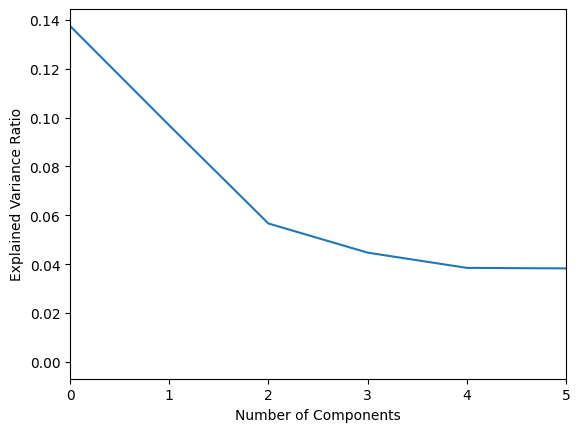

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA with all components
pca = PCA()
pca.fit(X_train)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

# Set the tick locations and labels along the x axis
plt.xticks(range(0, len(pca.explained_variance_ratio_)))

# Set the tick locations and labels along the y axis
# plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.xlim(0,5)

# Show the plot
plt.show()

In [47]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.13747748, 0.09679246])

In [35]:
view_X_train = pd.DataFrame(X_train, columns=['pca1','pca2'])
view_X_train

,pca1,pca2
0,-2.832375,-0.368529
1,1.376855,1.062528
2,2.666104,-0.103726
3,0.060916,0.995129
4,-1.754194,-0.938563
...,...,...
15062,1.001553,0.940519
15063,3.603674,-0.899227
15064,0.189397,-1.908532
15065,0.564815,0.097402


<Figure size 640x480 with 0 Axes>

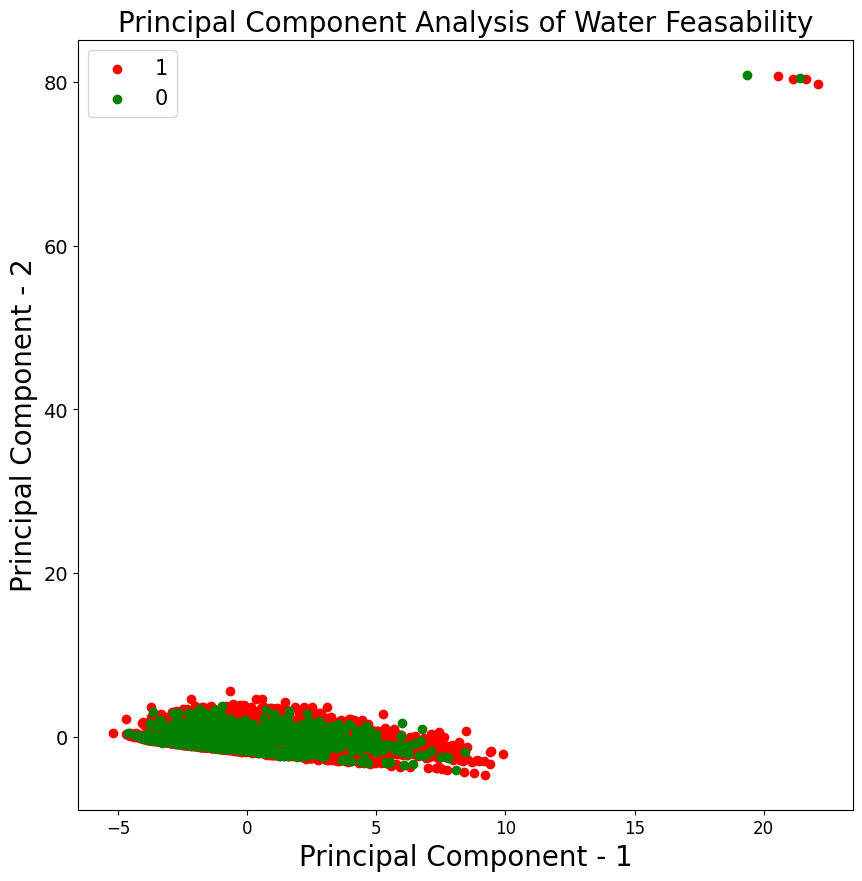

In [37]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Water Feasability",fontsize=20)
targets = [1, 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['DC201'] == target
    plt.scatter(view_X_train.loc[indicesToKeep, 'pca1']
               , view_X_train.loc[indicesToKeep, 'pca2'], c = color)

plt.legend(targets,prop={'size': 15})